In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import dependencies for pandas, numpy, matplotlib, config and sqlalchemy.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from config import pw
from sqlalchemy import create_engine

In [3]:
engine = create_engine(f'postgres://postgres:<password_here>@localhost:5432/ML_EmployeeSQL')
conn = engine.connect()

In [4]:
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_id,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


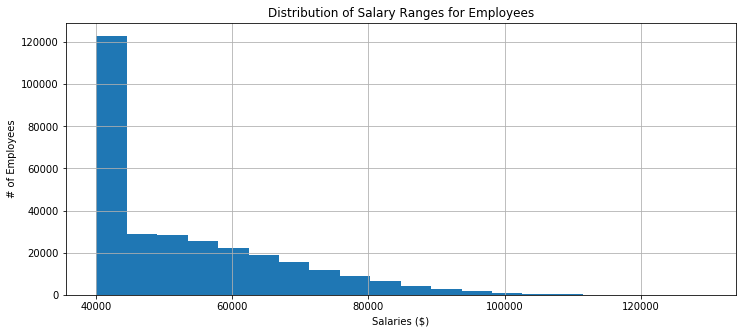

In [5]:
#Create a histogram to visualize the most common salary ranges for employees.
plt.figure(figsize=(12,5))
plt.hist(salaries["salary"], bins=20)
plt.ylabel('# of Employees')
plt.xlabel('Salaries ($)')
plt.title("Distribution of Salary Ranges for Employees")
plt.grid()
plt.show()



In [6]:
#3. Create a bar chart of average salary by title.
#join tables from SQL to get the needed columns
salaries_title = pd.read_sql("SELECT e.employee_id, e.employee_title_id, t.title, s.salary FROM employees AS e JOIN titles AS t ON e.employee_title_id = t.title_id JOIN salaries AS s ON e.employee_id = s.emp_id", conn)
salaries_title.head()


,employee_id,employee_title_id,title,salary
0,57444,e0002,Engineer,48973
1,13616,e0003,Senior Engineer,40000
2,240129,e0004,Technique Leader,43548
3,427958,s0001,Staff,63377
4,35916,e0003,Senior Engineer,40000


In [7]:
# groupby to get average salary
ave_salary_title = salaries_title.groupby(['title']).mean()
ave_salary_title.head(7)


,employee_id,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


In [8]:
#drop employee id columnn & reset index
revise_ave_salary_title = ave_salary_title.drop(columns="employee_id")
revise_ave_salary_title = revise_ave_salary_title.reset_index()
revise_ave_salary_title

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


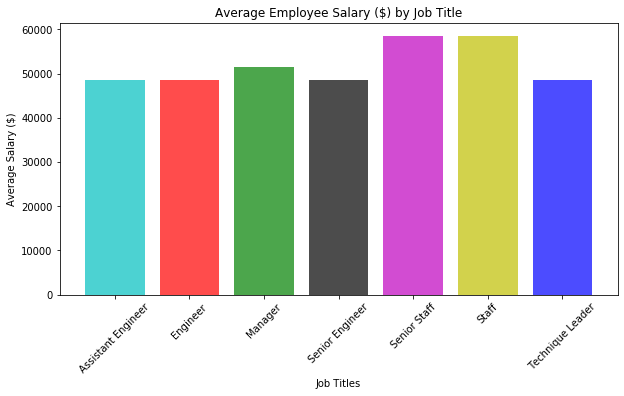

In [9]:
#3. Create the bar chart of average salary by title.
x_axis = revise_ave_salary_title["title"]
y_axis = revise_ave_salary_title["salary"]
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, align="center", alpha=0.7, color=["c", "r", "g", "k", "m", "y", "b"])
plt.xticks(x_axis, rotation=45)
plt.ylabel('Average Salary ($)')
plt.xlabel('Job Titles')
plt.title("Average Employee Salary ($) by Job Title")


plt.show()